In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

In [2]:
X.shape, y.shape

((506, 13), (506,))

0


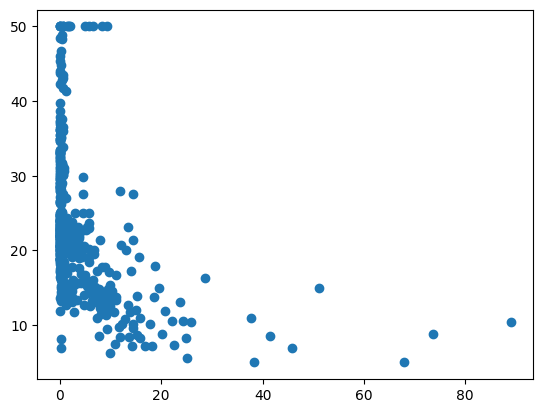

1


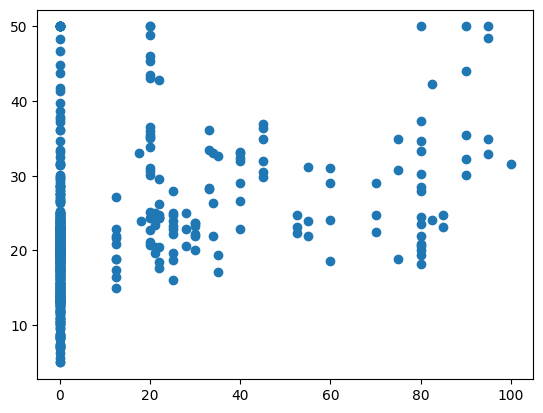

2


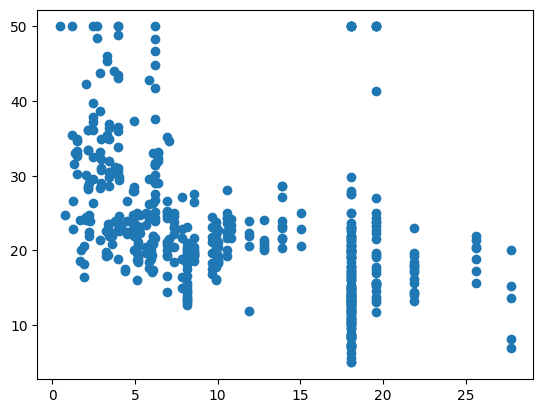

3


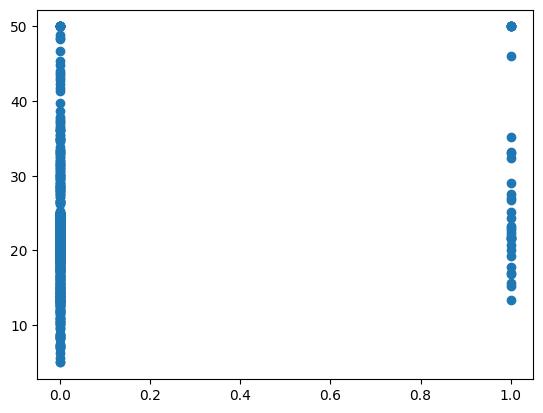

4


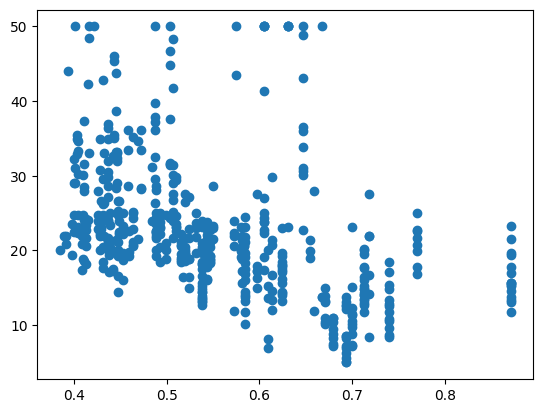

5


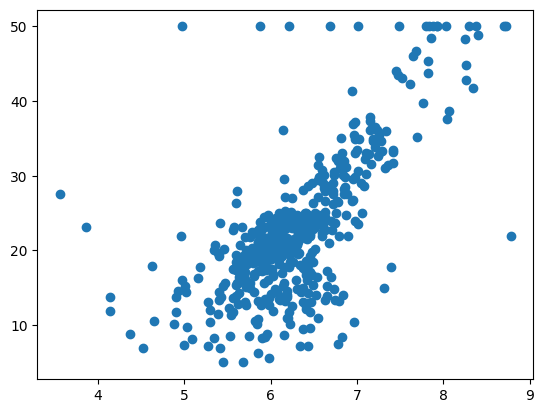

6


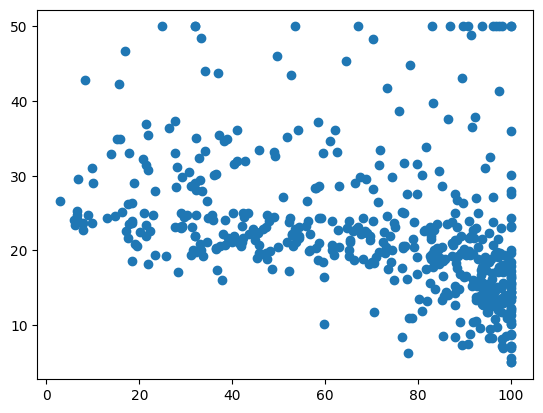

7


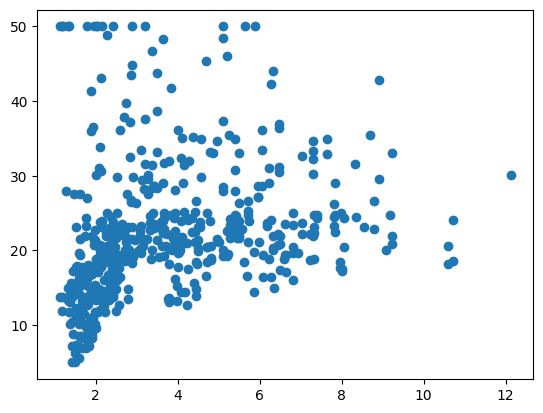

8


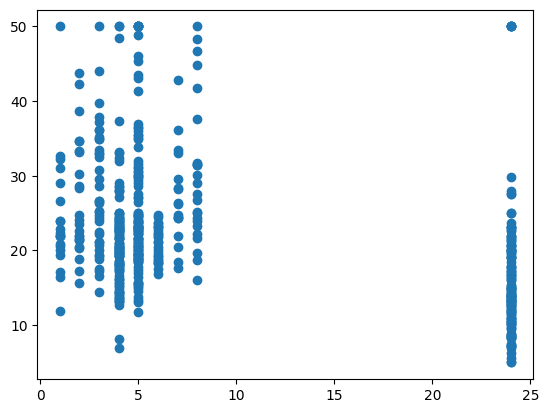

9


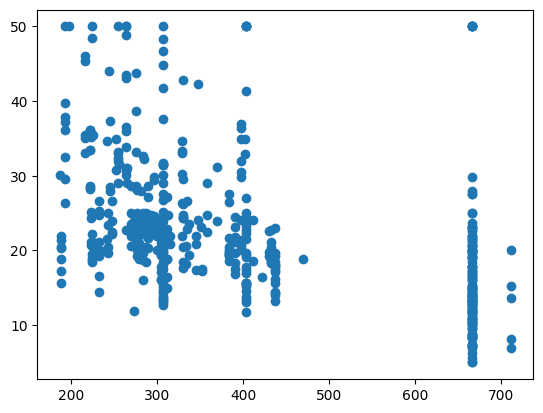

10


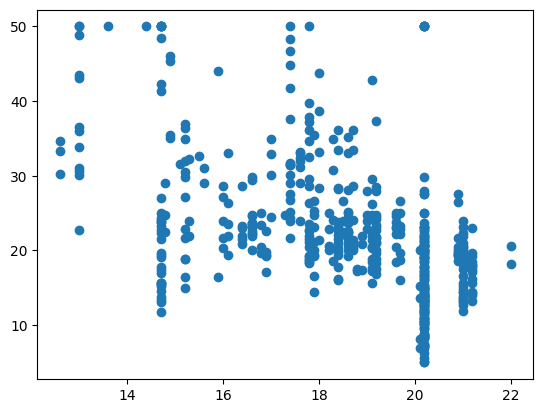

11


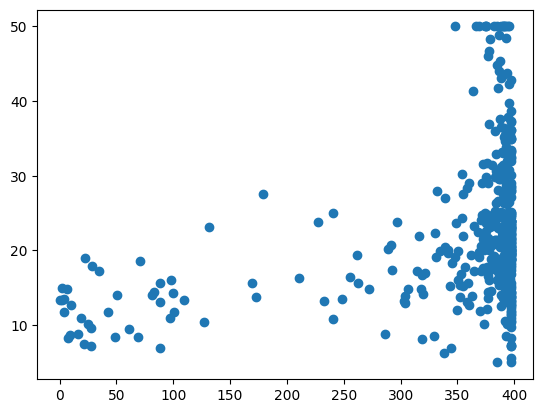

12


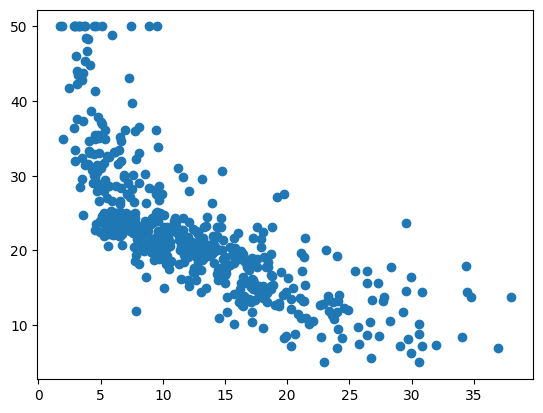

In [3]:
import matplotlib.pylab as plt

for i in range(X.shape[1]):
  print(i)
  plt.scatter(X[:,i], y)
  plt.show()

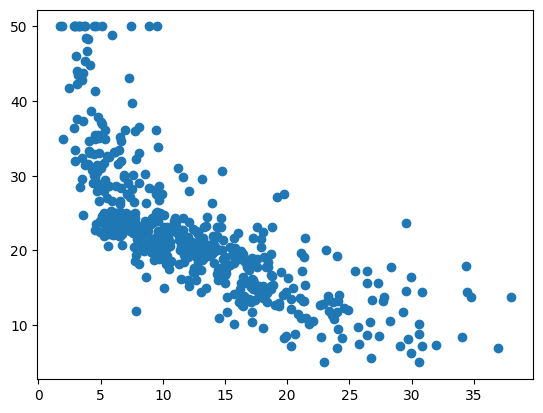

In [4]:
X12 = X[:,12:13]
plt.scatter(X12,y)
plt.show()

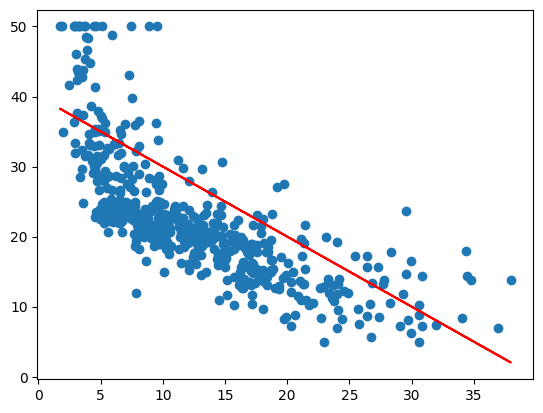

In [5]:
def modelo_linear(X, a, b):
  y = a*X + b
  return y

yPred = modelo_linear(X12, -1,40)
plt.scatter(X12, y)
plt.plot(X12, yPred, 'r')
plt.show()

In [22]:
def mae(y, yPred):
  yDiff = yPred - y.reshape(-1,1)
  yAbs = abs(yDiff)
  errorSum = sum(yAbs)
  mae = errorSum/len(yAbs)
  return mae

mae(y, yPred)

array([6.96547431])

In [23]:
def mse(y, yPred):
  yDiff = yPred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return mse

mse(y, yPred)

array([61.78580296])

In [24]:
from math import sqrt

def rmse(y, yPred):
  yDiff = yPred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return sqrt(mse)

rmse(y, yPred)

<ipython-input-24-d896bc8264c2>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sqrt(mse)


7.860394580708203

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y,yPred):
  mse = mean_squared_error(y, yPred)
  return sqrt(mse)

rmse(y, yPred)

7.860394580708203

Erro Quadrático Médio (MSE) com dados zerados: 592.1469169960474
Erro Quadrático Médio (MSE) com dados conhecidos: 61.78580296442688


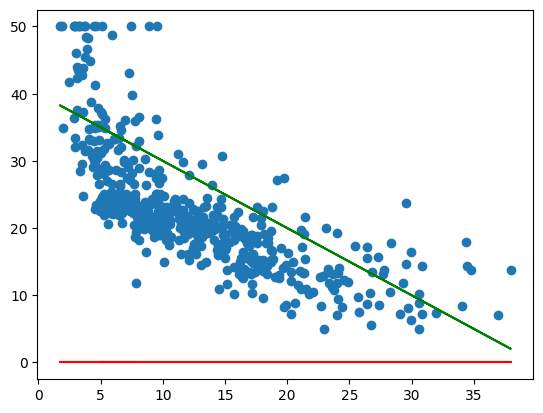

In [26]:
from sklearn.metrics import mean_squared_error

class regressao_linear():
  def __init__(self):
    self.a = 0
    self.b = 0

  def fit(self, X, y):
    self.a = -1
    self.b = 40

  def predict(self, X):
    y = self.a*X + self.b
    return y

plt.scatter(X12,y)
modelo = regressao_linear()
yPred = modelo.predict(X12)
print("Erro Quadrático Médio (MSE) com dados zerados:", mean_squared_error(y,yPred))
plt.plot(X12, yPred, 'r')

modelo.fit(X12, y)

yPred = modelo.predict(X12)
print("Erro Quadrático Médio (MSE) com dados conhecidos:", mean_squared_error(y,yPred))
plt.plot(X12, yPred, 'g')
plt.show()

24.334069059572577
6.20346413306178


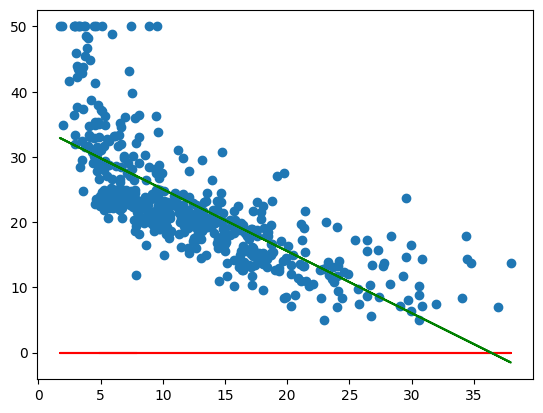

a: -0.9500317226790728, b: 34.55355094057261


In [11]:
class regressao_linear():
  def __init__(self):
    self.a = 0
    self.b = 0

  def fit(self, X, y):
    for i in range(500):
      yPred = self.predict(X)
      erro = yPred - y.reshape(-1,1)
      ajusteB = (sum(erro)/len(erro))
      self.b = self.b - 0.1 * ajusteB[0]

      ajusteA = sum([erro[i]*X[i] for i in range(X.shape[0])])/sum(X)
      self.a = self.a - ajusteA[0] * 0.1

  def predict(self, X):
    y = self.a*X + self.b
    return y

plt.scatter(X12,y)
modelo = regressao_linear()
yPred = modelo.predict(X12)
print(rmse(y, yPred))
plt.plot(X12, yPred, 'r')

modelo.fit(X12, y)

yPred = modelo.predict(X12)
print(rmse(y, yPred))
plt.plot(X12, yPred, 'g')
plt.show()

print(f'a: {modelo.a}, b: {modelo.b}')

24.334069059572577
6.20346413306178


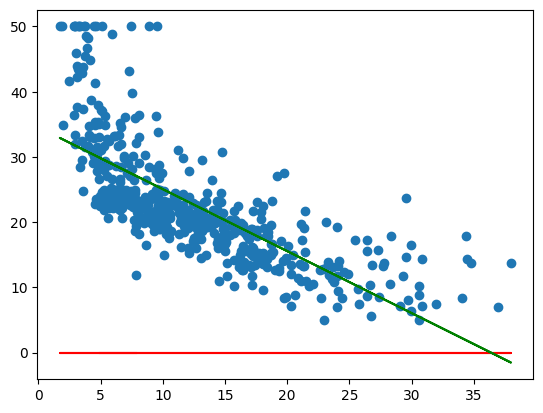

W: [[34.55355094]
 [-0.95003172]]


In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
  def __init__(self):
    self.W = np.zeros((2,1))

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias,X),axis = 1)
    return X_b

  def fit(self, X, y):
    X_b = self.addBias(X)
    for _ in range(500):
      yPred = self.predict(X)
      erro = yPred - y.reshape(-1,1)
      ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
      self.W = self.W - 0.1 * ajuste

  def predict(self, X):
    X_b = self.addBias(X)
    y = X_b.dot(self.W)
    return y

plt.scatter(X12, y)
modelo = regressao_linear()
yPred = modelo.predict(X12)
print(rmse(y, yPred))
plt.plot(X12, yPred, 'r')

modelo.fit(X12, y)

yPred = modelo.predict(X12)
print(rmse(y, yPred))
plt.plot(X12, yPred, 'g')
plt.show()

print(f'W: {modelo.W}')

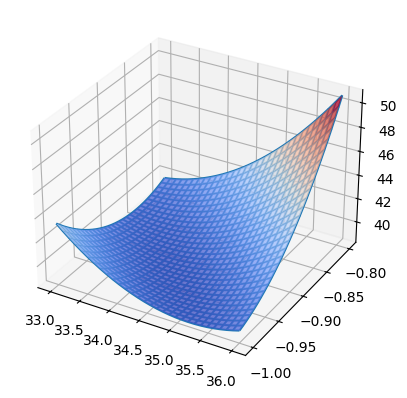

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

w0 = np.linspace(33, 36, 30)
w1 = np.linspace(-1, -0.8, 30)

def z_function(W0, W1):
  modelo = regressao_linear()
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
      modelo.W[0] = W0[j][k]
      modelo.W[1] = W1[j][k]
      yPred = modelo.predict(X12)
      mse = mean_squared_error(y, yPred)
      Erro[j][k] = mse
  return Erro

ax = plt.axes(projection = "3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride= 1, cstride = 1, alpha = 0.75, cmap='coolwarm', edgecolor='none')

plt.show()

In [14]:
w0

array([33.        , 33.10344828, 33.20689655, 33.31034483, 33.4137931 ,
       33.51724138, 33.62068966, 33.72413793, 33.82758621, 33.93103448,
       34.03448276, 34.13793103, 34.24137931, 34.34482759, 34.44827586,
       34.55172414, 34.65517241, 34.75862069, 34.86206897, 34.96551724,
       35.06896552, 35.17241379, 35.27586207, 35.37931034, 35.48275862,
       35.5862069 , 35.68965517, 35.79310345, 35.89655172, 36.        ])

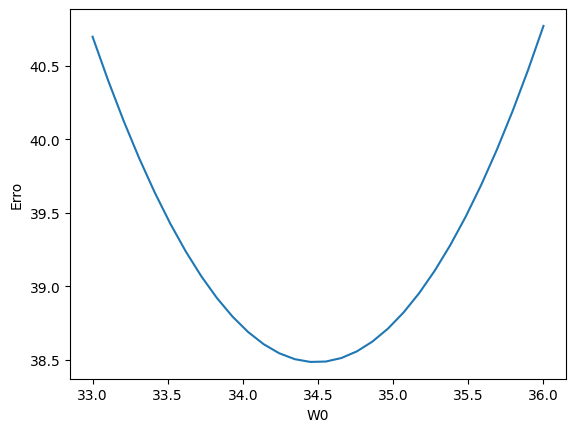

In [15]:
plt.ylabel("Erro")
plt.xlabel("W0")
i = 8
plt.plot(W0[i,:], Erro[i,:])
plt.show()

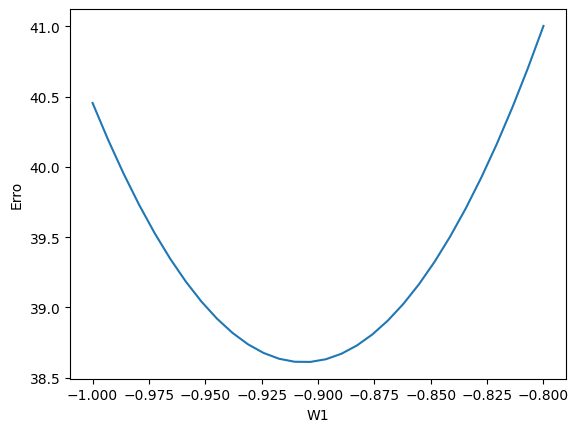

In [16]:
plt.ylabel("Erro")
plt.xlabel("W1")
i = 8
plt.plot(W1[:,i],Erro[:,i])
plt.show()

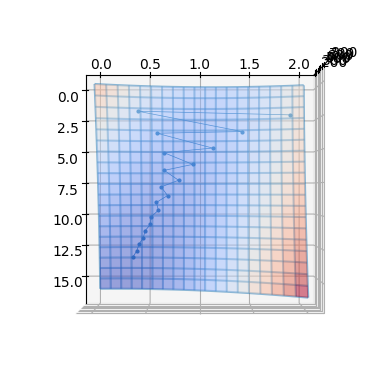

In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
  def __init__(self):
    self.W = np.zeros((2,1))
    self.wh = []

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias,X),axis = 1)
    return X_b

  def fit(self, X, y):
    X_b = self.addBias(X)
    for _ in range(20):
      yPred = self.predict(X)
      erro = yPred - y.reshape(-1,1)
      ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
      self.W = self.W - 0.1 * ajuste

      yPred = self.predict(X)
      mse = mean_squared_error(y, yPred)
      self.wh.append([self.W[0,0], self.W[1,0], mse])

  def predict(self, X):
    X_b = self.addBias(X)
    y = X_b.dot(self.W)
    return y

w0 = np.linspace(0, 16, 20)
w1 = np.linspace(0, 2, 20)

def z_function(W0, W1):
  modelo = regressao_linear()
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
      modelo.W[0] = W0[j][k]
      modelo.W[1] = W1[j][k]
      yPred = modelo.predict(X12)
      mse = mean_squared_error(y, yPred)
      Erro[j][k] = mse
  return Erro

ax = plt.axes(projection = "3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro, alpha = 0.5)
ax.plot_surface(W0, W1, Erro, rstride= 1, cstride = 1, alpha = 0.5, cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()
modelo.fit(X12,y)
yPred = modelo.predict(X12)
wh = np.array(modelo.wh)
ax.plot(wh[:,0], wh[:,1],wh[:,2], marker = 'o', linewidth= '0.5', markersize = 2)

ax.view_init(azim=0, elev=90)

plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X12, y)
yPred = modelo.predict(X12)
print(mean_squared_error(y, yPred))
print(modelo.intercept_, modelo.coef_)

38.48296722989415
34.5538408793831 [-0.95004935]


In [19]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X, y)
yPred = modelo.predict(X)
print(mean_squared_error(y, yPred))
print(modelo.intercept_, modelo.coef_)

21.894831181729202
36.459488385089955 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
